# Tratamento de outliers

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

1. Achar a média de cada variável

2. Para cada variável, encontrar o desvio padrão 

3. Para cada variável, se determinado registro for maior ou igual a três desvios padrões + média (outlier), substituir  o valor 
   por interpolação linear dos registros adjacentes

'''

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#dados da estação de São Cristóvão
df_sc_new=pd.read_csv('df_sc_new.csv')

In [4]:
#dados da estação da Tijuca
df_sp_new=pd.read_csv('df_sp_new.csv')

In [5]:
#São Cristóvão
df_sc_new.head(1) 

,Data,Chuva_sc,Pres_sc,RS_sc,Temp_sc,UR_sc,Vel_Vento_sc,SO2_sc,NO2_sc,CO_sc,NO_sc,NOx_sc,O3_sc,PM10_sc
0,2012-10-01 15:30:00,0.0,1012.32,200.12,31.42,57.46,1.7,3.84,31.92,0.11,31.92,43.16,57.61,27.0


In [6]:
#Tijuca
df_sp_new.head(1) 

,Data,Chuva_sp,Pres_sp,RS_sp,Temp_sp,UR_sp,Vel_Vento_sp,SO2_sp,NO2_sp,CO_sp,NO_sp,NOx_sp,O3_sp,PM10_sp
0,2012-10-01 15:30:00,0.0,1011.48,473.67,33.16,40.58,0.78,3.12,31.92,0.6,31.92,43.16,49.9,27.77


In [7]:
# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sp_new=df_sp_new[['Data','Temp_sp','NOx_sp','CO_sp','Chuva_sp','Pres_sp','Vel_Vento_sp','SO2_sp','PM10_sp','O3_sp','UR_sp']]

In [8]:
# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sc_new=df_sc_new[['Data','Temp_sc','NOx_sc','CO_sc','Chuva_sc','Pres_sc','Vel_Vento_sc','SO2_sc','PM10_sc','O3_sc','UR_sc']]

In [9]:
# desvio padrão das variáveis do dataframe da Tijuca
df_sp_new.std()

Temp_sp          5.603599
NOx_sp          35.907004
CO_sp            0.252008
Chuva_sp         3.706666
Pres_sp          5.385422
Vel_Vento_sp     1.122239
SO2_sp           5.782657
PM10_sp         18.924257
O3_sp           24.830731
UR_sp           19.398027
dtype: float64

In [10]:
# média das variáveis do dataframe da Tijuca
df_sp_new.mean()

Temp_sp           24.423311
NOx_sp            57.234630
CO_sp              0.401673
Chuva_sp           0.150513
Pres_sp         1015.098704
Vel_Vento_sp       0.736632
SO2_sp             3.773778
PM10_sp           32.948537
O3_sp             28.366178
UR_sp             65.757445
dtype: float64

In [11]:
# desvio padrão das variáveis do dataframe de São Cristóvão
df_sc_new.std()

Temp_sc          4.771902
NOx_sc          35.907004
CO_sc            0.321004
Chuva_sc         0.965220
Pres_sc          4.810906
Vel_Vento_sc     0.582975
SO2_sc           9.602003
PM10_sc         21.806007
O3_sc           26.548084
UR_sc           17.142190
dtype: float64

In [12]:
# média das variáveis do dataframe de São Cristóvão
df_sc_new.mean()

Temp_sc           26.511795
NOx_sc            57.234630
CO_sc              0.241478
Chuva_sc           0.105082
Pres_sc         1014.916328
Vel_Vento_sc       0.891624
SO2_sc             7.672783
PM10_sc           34.386848
O3_sc             24.037099
UR_sc             72.125128
dtype: float64

**Tijuca**

In [13]:
# Temp_sp
def change_Temp_sp(value):
    if value>=24.423311+3*5.603599:
        value=None
    return value

# NOx_sp
def change_NOx_sp(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sp
def change_CO_sp(value):
    if value>=0.401673+3*0.252008:
        value=None
    return value
        
# Chuva_sp
def change_Chuva_sp(value):
    if value>=0.150513+3*3.706666:
        value=None
    return value

# Pres_sp
def change_Pres_sp(value):
    if value>=1015.098704+3*5.385422:
        value=None
    return value
        
# Vel_Vento_sp
def change_Vel_Vento_sp(value):
    if value>=0.736632+3*1.122239:
        value=None
    return value
        
# SO2_sp
def change_SO2_sp(value):
    if value>=3.773778+3*5.782657:
        value=None
    return value

# PM10_sp
def change_PM10_sp(value):
    if value>=32.948537+3*18.924257:
        value=None
    return value
        
# O3_sp
def change_O3_sp(value):
    if value>=28.366178+3*24.830731:
        value=None
    return value
        
# UR_sp
def change_UR_sp(value):
    if value>=65.757445+3*19.398027:
        value=None
    return value

df_sp_new['Temp_sp']=df_sp_new['Temp_sp'].apply(change_Temp_sp)
df_sp_new['NOx_sp']=df_sp_new['NOx_sp'].apply(change_NOx_sp)
df_sp_new['CO_sp']=df_sp_new['CO_sp'].apply(change_CO_sp)
df_sp_new['Chuva_sp']=df_sp_new['Chuva_sp'].apply(change_Chuva_sp)
df_sp_new['Pres_sp']=df_sp_new['Pres_sp'].apply(change_Pres_sp)
df_sp_new['Vel_Vento_sp']=df_sp_new['Vel_Vento_sp'].apply(change_Vel_Vento_sp)
df_sp_new['SO2_sp']=df_sp_new['SO2_sp'].apply(change_SO2_sp)
df_sp_new['PM10_sp']=df_sp_new['PM10_sp'].apply(change_PM10_sp)
df_sp_new['O3_sp']=df_sp_new['O3_sp'].apply(change_O3_sp)
df_sp_new['UR_sp']=df_sp_new['UR_sp'].apply(change_UR_sp)

df_sp_new.interpolate(method='linear', inplace=True)

**São Cristóvão**

In [14]:
# Temp_sc
def change_Temp_sc(value):
    if value>= 26.511795+3*4.771902:
        value=None
    return value

# NOx_sc
def change_NOx_sc(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sc
def change_CO_sc(value):
    if value>=0.241478+3*0.321004:
        value=None
    return value
        
# Chuva_sc
def change_Chuva_sc(value):
    if value>=0.105082+3*0.965220:
        value=None
    return value

# Pres_sc
def change_Pres_sc(value):
    if value>=1014.916328+3*4.810906:
        value=None
    return value
        
# Vel_Vento_sc
def change_Vel_Vento_sc(value):
    if value>=0.891624+3*0.582975:
        value=None
    return value
        
# SO2_sc
def change_SO2_sc(value):
    if value>=7.672783+3*9.602003:
        value=None
    return value

# PM10_sc
def change_PM10_sc(value):
    if value>=34.386848+3*21.806007:
        value=None
    return value
        
# O3_sc
def change_O3_sc(value):
    if value>=24.037099+3*26.548084:
        value=None
    return value
        
# UR_sc
def change_UR_sc(value):
    if value>=72.125128+3*17.142190:
        value=None
    return value

df_sc_new['Temp_sc']=df_sc_new['Temp_sc'].apply(change_Temp_sc)
df_sc_new['NOx_sc']=df_sc_new['NOx_sc'].apply(change_NOx_sc)
df_sc_new['CO_sc']=df_sc_new['CO_sc'].apply(change_CO_sc)
df_sc_new['Chuva_sc']=df_sc_new['Chuva_sc'].apply(change_Chuva_sc)
df_sc_new['Pres_sc']=df_sc_new['Pres_sc'].apply(change_Pres_sc)
df_sc_new['Vel_Vento_sc']=df_sc_new['Vel_Vento_sc'].apply(change_Vel_Vento_sc)
df_sc_new['SO2_sc']=df_sc_new['SO2_sc'].apply(change_SO2_sc)
df_sc_new['PM10_sc']=df_sc_new['PM10_sc'].apply(change_PM10_sc)
df_sc_new['O3_sc']=df_sc_new['O3_sc'].apply(change_O3_sc)
df_sc_new['UR_sc']=df_sc_new['UR_sc'].apply(change_UR_sc)

df_sc_new.interpolate(method='linear', inplace=True)

# Agrupamento dos dados por dia + padronização

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a ideia encontrada no artigo deste ano:
https://www.researchgate.net/publication/347444018_A_Novel_Deep_Learning_Approach_to_Predict_Air_Quality_Index

Os dados, que inicialmente são horários, foram agrupados por dia (máxima diária), isto aumenta o range de previsão do modelo

'''

**Tijuca**

In [15]:
df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

Foi escolhida normalização ao invés de padronização, pois as distribuições das variáveis não são normais

In [16]:
names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sp_new_scaled.index=df_sp_new.index

**São Cristóvão**

In [17]:
df_sc_new.reset_index(inplace=True)

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sc_new_scaled.index=df_sc_new.index

# geração do modelo com dados vetorizados

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a ideia encontrada no artigo de 2020:
https://arxiv.org/abs/1903.02791

Ao invés de gerar um modelo que prevê a concentração para cada variável separadamente, os dados são vetorizados e é gerado um
modelo que faz as previsões para as 10 variáveis em conjunto.

'''

In [19]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

In [20]:
values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

In [21]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
model.add(LSTM(250,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
model.compile(loss='mse', optimizer=opt)

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 250)            261000    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             2510      
_________________________________________________________________
dense_2 (Dense)              (None, 1, 10)             110       
Total params: 303,810
Trainable params: 303,810
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 4s - loss: 0.3471 - val_loss: 0.3437
Epoch 2/5
5/5 - 0s - loss: 0.3215 - val_loss: 0.3102
Epoch 3/5
5/5 - 0s - loss: 0.2843 - val_loss: 0.2638
Epoch 4/5
5/5 - 0s - loss: 0.2351 - val_loss: 0.2078
Epoch 5/5
5/5 - 0s - loss: 0.1802 - val_loss: 0.1562

Model Runtime: 4.49 seconds


In [24]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [25]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,20.435537,73.719727,0.357447,-0.689025,1009.681946,0.975675,15.763798,20.165257,56.272282,78.393005


In [26]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


### Cálculo do RMSE

Temp_sc

In [28]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 11.939


NOx_sc

In [29]:
rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 39.277


CO_sc

In [30]:
rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.352


Chuva_sc

In [31]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.465


Pres_sc

In [32]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.520


Vel_Vento_sc

In [33]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.047


SO2_sc

In [34]:
rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 10.180


PM10_sc

In [35]:
rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 44.833


O3_sc

In [36]:
rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 25.406


UR_sc

In [37]:
rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.416


### Cálculo do MAE 

Temp_sc

In [38]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 10.958


NOx_sc

In [39]:
mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 32.749


CO_sc

In [40]:
mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.268


Chuva_sc

In [41]:
mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 1.197


Pres_sc

In [42]:
mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 7.319


Vel_Vento_sc

In [43]:
mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.946


SO2_sc

In [44]:
mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 8.598


PM10_sc

In [45]:
mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 39.313


O3_sc

In [46]:
mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 21.432


UR_sc

In [47]:
mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test MAE: %.3f' % mae)

Test MAE: 14.034


### Cálculo do R2

Temp_sc

In [48]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test R2: %.3f' % r2)

Test R2: -5166.143


NOx_sc

In [49]:
r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test R2: %.3f' % r2)

Test R2: -41.812


CO_sc

In [50]:
r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test R2: %.3f' % r2)

Test R2: -131.849


Chuva_sc

In [51]:
r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test R2: %.3f' % r2)

Test R2: -396.009


Pres_sc

In [52]:
r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test R2: %.3f' % r2)

Test R2: -396.009


Vel_Vento_sc

In [53]:
r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test R2: %.3f' % r2)

Test R2: -1004.797


SO2_sc

In [54]:
r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test R2: %.3f' % r2)

Test R2: -54.539


PM10_sc

In [55]:
r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test R2: %.3f' % r2)

Test R2: -2310.387


O3_sc

In [56]:
r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test R2: %.3f' % r2)

Test R2: -30.477


UR_sc

In [57]:
r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test R2: %.3f' % r2)

Test R2: -85.406


**história do treinamento**

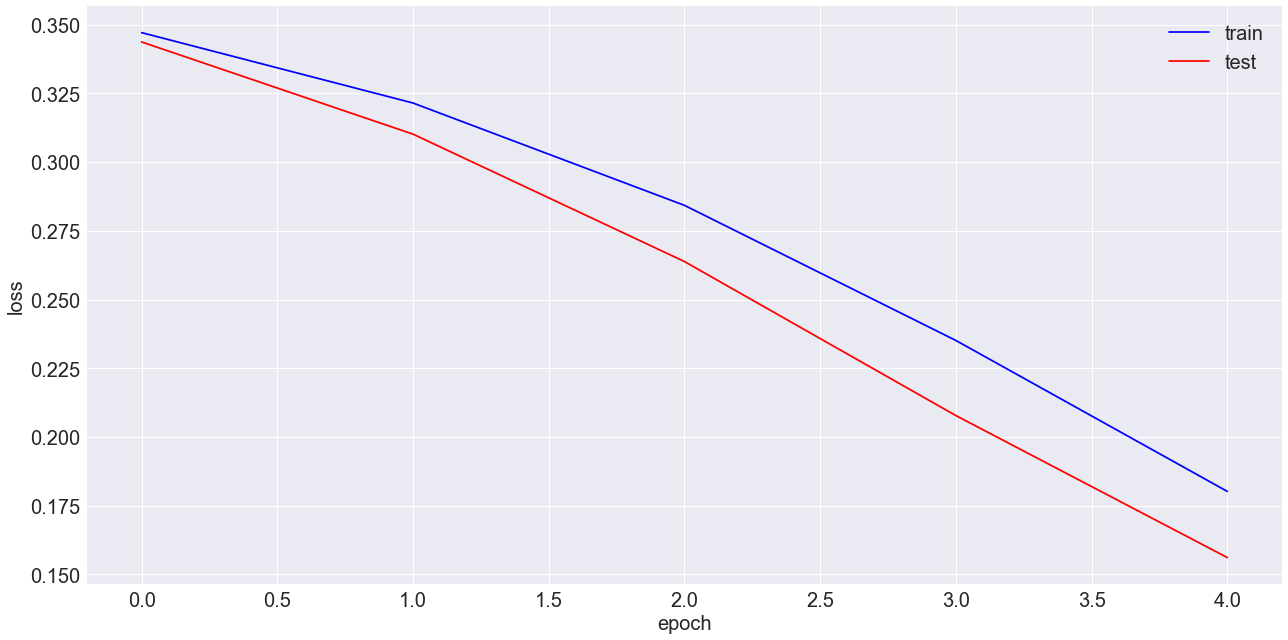

In [27]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 1- block cross validation

In [58]:
from IPython.display import Image
# Image("img/picture.png")

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a teoria encontrada no artigo abaixo:
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

Foram experimentadas dois métodos de validação cruzada com série temporal

aqui usei k=5 e coloquei somente a primeira quinta parte do treinamento como exemplo, utilizando os dados do dataframe
correspondente a estação de São Cristóvão

'''

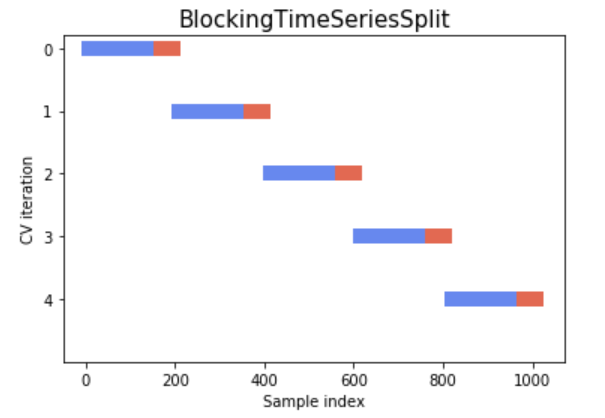

In [59]:
Image("block.png")

**divisão dos folds (k=5)**

In [62]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

df_sc_new=pd.read_csv('df_sc_new.csv')
df_sp_new=pd.read_csv('df_sp_new.csv')
# df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])
df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new.reset_index(inplace=True)

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sp = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled_sp, columns=names)

df_sp_new_scaled.index=df_sp_new.index

df_sc_new.reset_index(inplace=True)

# df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)
df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)
df_sc_new_scaled.index=df_sc_new.index

values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

**treinamento do modelo para o primeiro 1/5 da divisão**

In [63]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[:634]

In [64]:
# split into train and test sets
values = reframed.values
n_train_days = 127

In [65]:
train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
model.add(LSTM(250,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 4s - loss: 0.1767 - val_loss: 0.1525
Epoch 2/5
1/1 - 0s - loss: 0.1750 - val_loss: 0.1509
Epoch 3/5
1/1 - 0s - loss: 0.1733 - val_loss: 0.1494
Epoch 4/5
1/1 - 0s - loss: 0.1716 - val_loss: 0.1477
Epoch 5/5
1/1 - 0s - loss: 0.1698 - val_loss: 0.1460

Model Runtime: 4.21 seconds


**resultados do treinamento**

In [66]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [67]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 14.441
Test NOx_sc RMSE: 95.288
Test CO_sc RMSE: 1.184
Test Chuva_sc RMSE: 3.600
Test Pres_sc RMSE: 13.151
Test Vel_Vento_sc RMSE: 1.497
Test SO2_sc RMSE: 30.799
Test PM10_sc RMSE: 68.953
Test O3_sc RMSE: 52.981
Test UR_sc RMSE: 33.784


In [68]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 13.554
Test NOx_sc MAE: 73.403
Test CO_sc MAE: 0.913
Test Chuva_sc MAE: 1.547
Test Pres_sc MAE: 12.442
Test Vel_Vento_sc MAE: 1.354
Test SO2_sc MAE: 23.249
Test PM10_sc MAE: 61.338
Test O3_sc MAE: 46.570
Test UR_sc MAE: 32.671


In [69]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -470064.302
Test NOx_sc R2: -53357.856
Test CO_sc R2: -21326.275
Test Pres_sc R2: -70517.146
Test Pres_sc R2: -70517.146
Test Vel_Vento_sc R2: -63373.077
Test SO2_sc R2: -20102.673
Test PM10_sc R2: -31577.871
Test O3_sc R2: -19989.096
Test UR_sc R2: -166376.895


**plot do histórico do treinamento**

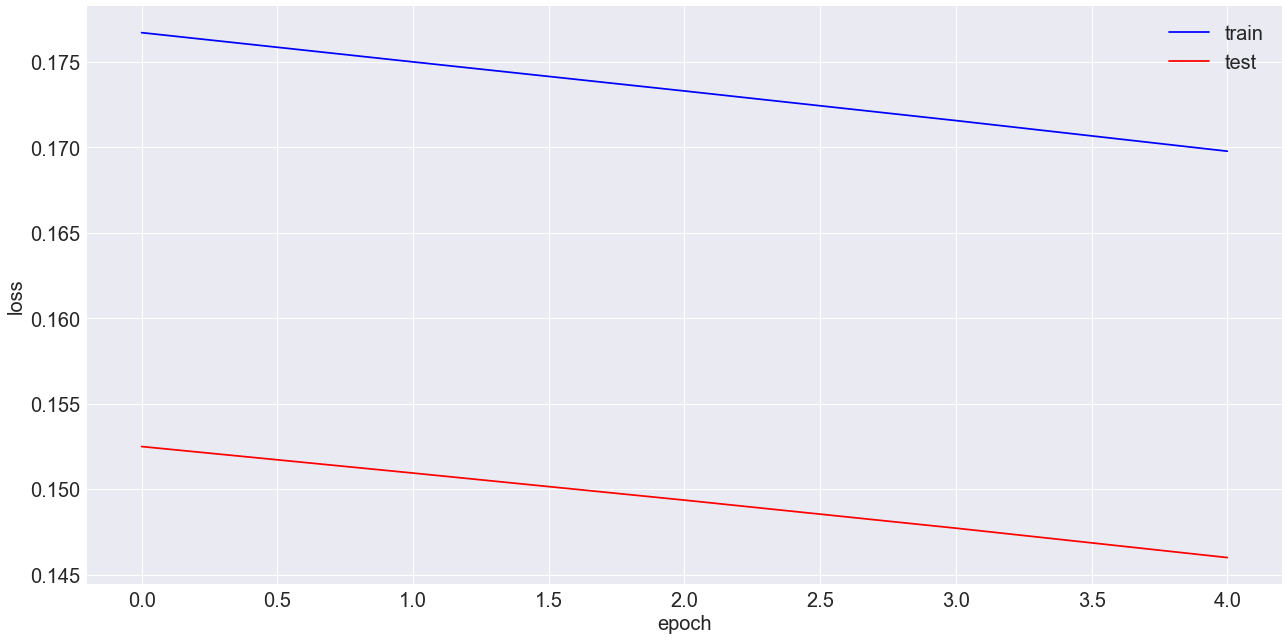

In [71]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 2- split cross validation

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Conforme a teoria encontrada no artigo abaixo:
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

Foram experimentadas dois métodos de validação cruzada com série temporal

aqui usei k=5 e coloquei somente a primeira quinta parte do treinamento como exemplo, utilizando os dados do dataframe
correspondente a estação de São Cristóvão

'''

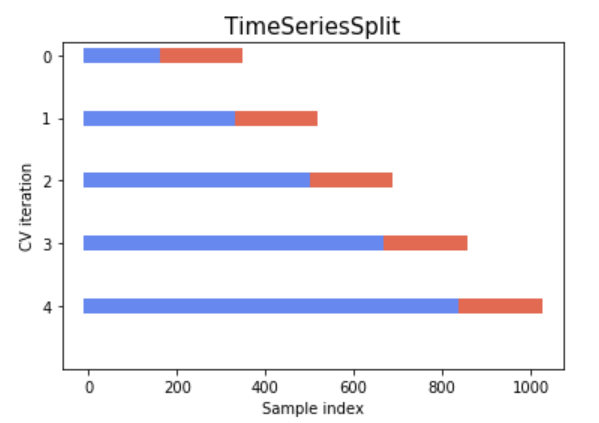

In [60]:
Image("split.png")

**divisão dos fold (k=5) e treinamento para o primeiro 1/5**

In [87]:
import pandas as pd
import warnings
import time
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
warnings.filterwarnings("ignore")

df_sc_new=pd.read_csv('df_sc_new.csv')
df_sp_new=pd.read_csv('df_sp_new.csv')

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new.reset_index(inplace=True)

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)

df_sc_new_scaled.index=df_sc_new.index
values = df_sc_new_scaled.values

values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:1056]

# split into train and test sets
values = reframed.values
n_train_days = 528

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
model.add(LSTM(250,return_sequences=True))
model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
2/2 - 4s - loss: 0.1628 - val_loss: 0.1300
Epoch 2/5
2/2 - 0s - loss: 0.1595 - val_loss: 0.1273
Epoch 3/5
2/2 - 0s - loss: 0.1561 - val_loss: 0.1244
Epoch 4/5
2/2 - 0s - loss: 0.1523 - val_loss: 0.1210
Epoch 5/5
2/2 - 0s - loss: 0.1479 - val_loss: 0.1172

Model Runtime: 3.99 seconds


**resultados do treinamento**

In [88]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 12.152
Test NOx_sc RMSE: 128.121
Test CO_sc RMSE: 1.073
Test Chuva_sc RMSE: 2.994
Test Pres_sc RMSE: 14.073
Test Vel_Vento_sc RMSE: 1.501
Test SO2_sc RMSE: 25.442
Test PM10_sc RMSE: 71.897
Test O3_sc RMSE: 61.010
Test UR_sc RMSE: 25.102


In [90]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 11.253
Test NOx_sc MAE: 114.477
Test CO_sc MAE: 0.841
Test Chuva_sc MAE: 1.106
Test Pres_sc MAE: 13.346
Test Vel_Vento_sc MAE: 1.319
Test SO2_sc MAE: 20.317
Test PM10_sc MAE: 64.361
Test O3_sc MAE: 53.495
Test UR_sc MAE: 24.017


In [91]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -81475.701
Test NOx_sc R2: -107956.169
Test CO_sc R2: -11985.472
Test Pres_sc R2: -212184.279
Test Pres_sc R2: -212184.279
Test Vel_Vento_sc R2: -62248.325
Test SO2_sc R2: -7669.515
Test PM10_sc R2: -41668.887
Test O3_sc R2: -7946.556
Test UR_sc R2: -63480.286


**histórico do treinamento**

In [92]:
InteractiveShell.ast_node_interactivity = "last_expr"

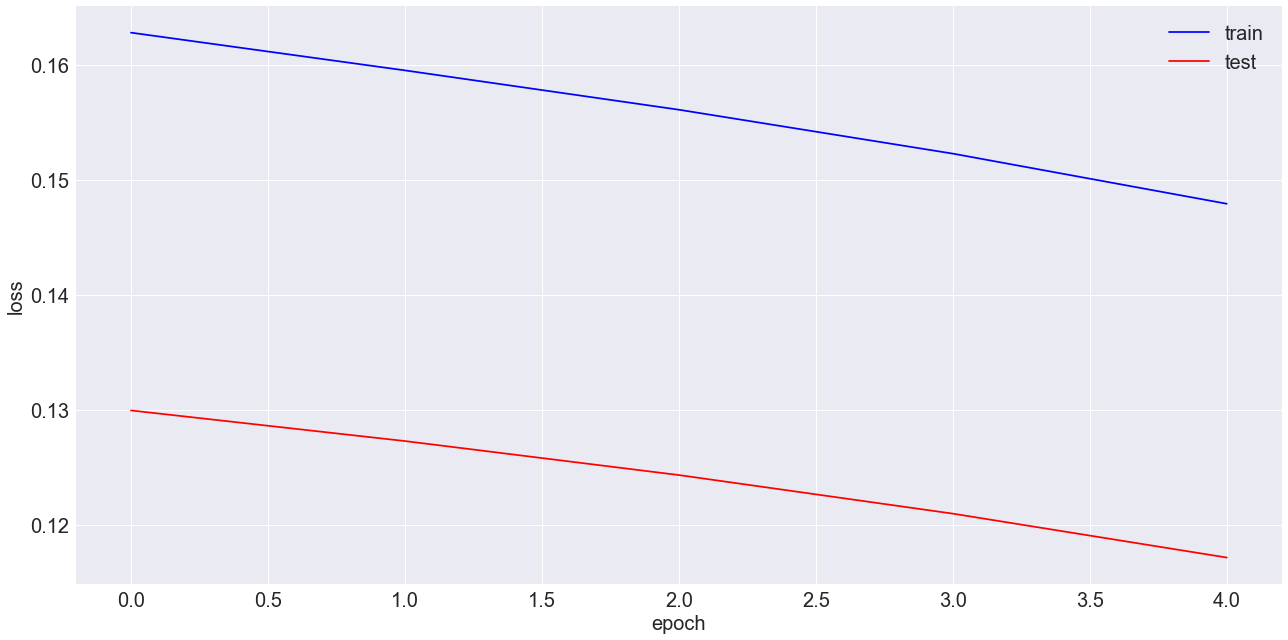

In [93]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# links sobre hiperparâmetros de redes neurais recorrentes LSTM

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Nesta etapa, com intuito de conseguir o melhor modelo, pesquisei sobre os hiperparâmetros que compõem as redes LSTM.
Abaixo seguem os links que salvei da pesquisa

'''

**-ativação (x)**
https://keras.io/api/layers/activations/
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
https://medium.com/@snaily16/what-why-and-which-activation-functions-b2bf748c0441
http://kth.diva-portal.org/smash/get/diva2:1465073/FULLTEXT01.pdf

**-diferença entre ativação e recurrent_activation (x)**:
https://stackoverflow.com/questions/44947842/can-someone-explain-to-me-the-difference-between-activation-and-recurrent-activa

**-significado dos layers:(x)**
https://stackoverflow.com/questions/57414387/meaning-of-tf-keras-layers-lstm-parameters
https://machinelearningmastery.com/use-dropout-lstm-networks-time-series-forecasting/

**-kernel initializer:(x)**
https://keras.io/api/layers/initializers/
https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
https://wandb.ai/sayakpaul/weight-initialization-tb/reports/Effects-of-Weight-Initialization-on-Neural-Networks--Vmlldzo2ODY0NA

**-recurrent initializer:(x)**
https://stackoverflow.com/questions/63630659/what-does-recurrent-initializer-do
https://notebook.community/infilect/ml-course1/deep-learning-keras/keras-notebooks/RNN/7.1%20RNN%20and%20LSTM
https://stackoverflow.com/questions/64881855/kernel-and-recurrent-kernel-in-keras-lstms

**-bias initializer:(x)**
https://www.tutorialexample.com/understand-lstm-weight-and-bias-initialization-when-initializer-is-none-in-tensorflow-tensorflow-tutorial/
https://medium.com/@glenmeyerowitz/bias-initialization-in-a-neural-network-2e5d26fed0f0
https://cs231n.github.io/neural-networks-2/


**-kernel regularizer:(x)**
https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/ https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

**-bias regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

**-activity regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/

**-kernel constraint:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/

**-dropout:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

**-recurrent dropout:(x)**
https://stackoverflow.com/questions/44924690/keras-the-difference-between-lstm-dropout-and-lstm-recurrent-dropout

**-return sequences/states:(x)**
https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/
https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/

**-go backwards:(x)**
https://stackoverflow.com/questions/49946942/keras-lstm-go-backwards-usage

**-stateful:(x)**
https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/
https://stackoverflow.com/questions/39681046/keras-stateful-vs-stateless-lstms

**-time_major:(x)**
https://stackoverflow.com/questions/42130491/batch-major-vs-time-major-lstm

**-unroll:(x)**
https://machinelearningmastery.com/rnn-unrolling/
https://stats.stackexchange.com/questions/492040/what-is-unrolling-in-lstm